In [1]:
import matplotlib.pyplot as plt
import pandas as pd

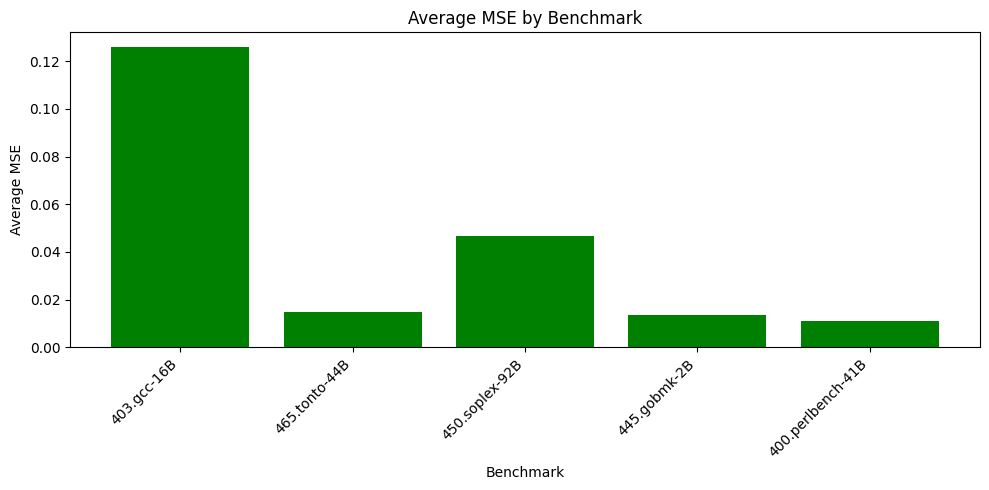

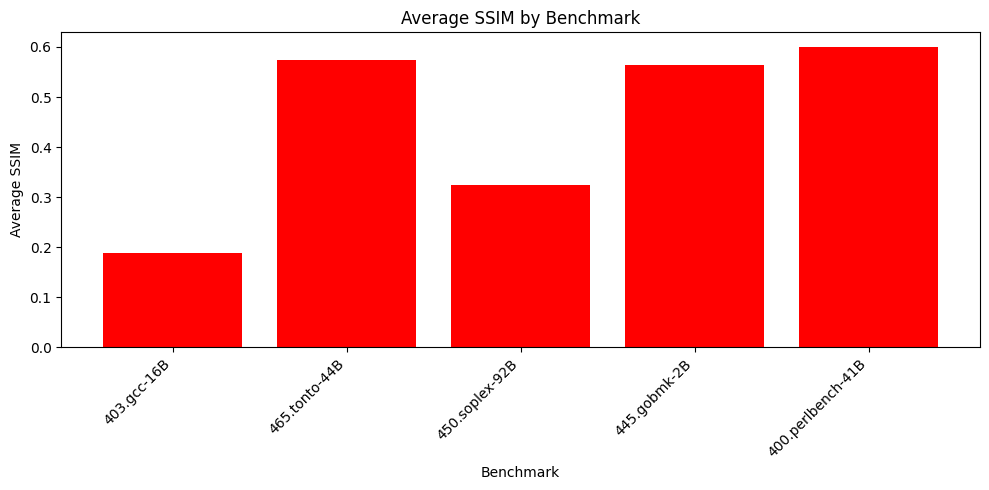

In [6]:
import matplotlib.pyplot as plt

benchmarks = [
    "403.gcc-16B",
    "465.tonto-44B",
    "450.soplex-92B",
    "445.gobmk-2B",
    "400.perlbench-41B",
]

avg_mse = [
    0.12584874725341796,
    0.014633018493652344,
    0.04665596008300781,
    0.013594375610351563,
    0.010896415710449218,
]

avg_ssim = [
    0.18746338117731504,
    0.5741251632595348,
    0.3247827272703148,
    0.5643316326769777,
    0.5992744832008992,
]

plt.figure(figsize=(10, 5))
plt.bar(benchmarks, avg_mse, color='green')
plt.xlabel("Benchmark")
plt.ylabel("Average MSE")
plt.title("Average MSE by Benchmark")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(benchmarks, avg_ssim, color='red')
plt.xlabel("Benchmark")
plt.ylabel("Average SSIM")
plt.title("Average SSIM by Benchmark")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


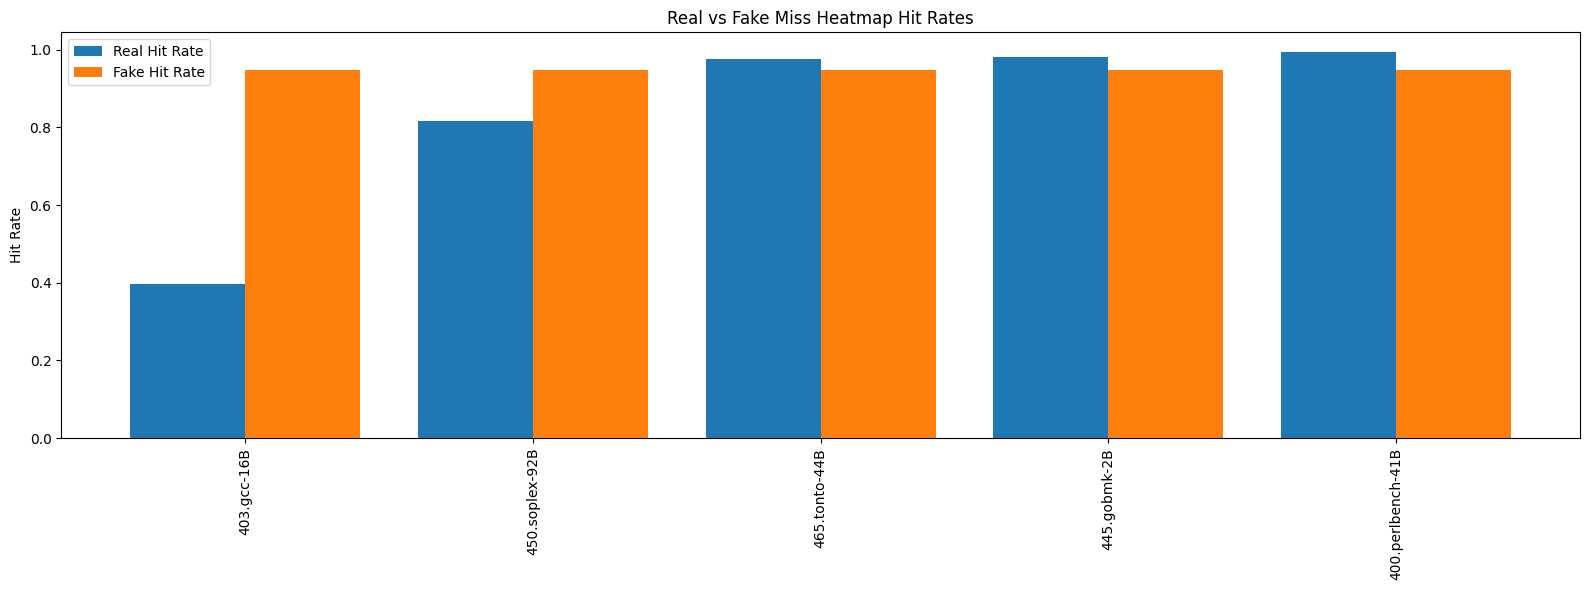

In [5]:
# Load both CSVs (adjust paths if needed)
real_df = pd.read_csv("hitrate_real_summary_1000.csv")
fake_df = pd.read_csv("hitrate_summary.csv")

# Standardize column names if needed
real_df.columns = [c.lower() for c in real_df.columns]
fake_df.columns = [c.lower() for c in fake_df.columns]

# Expected columns: trace, hit_rate
real_df = real_df[["trace", "hit_rate"]].rename(columns={"hit_rate": "real_hit"})
fake_df = fake_df[["trace", "hit_rate"]].rename(columns={"hit_rate": "fake_hit"})

# Merge on trace name
df = real_df.merge(fake_df, on="trace", how="inner")

# Sort by real hit rate
df = df.sort_values("real_hit")

# Plot
plt.figure(figsize=(16, 6))

x = range(len(df))
bar_width = 0.4

plt.bar(x, df["real_hit"], width=bar_width, label="Real Hit Rate")
plt.bar([i + bar_width for i in x], df["fake_hit"], width=bar_width, label="Fake Hit Rate")

plt.xticks([i + bar_width/2 for i in x], df["trace"], rotation=90)
plt.ylabel("Hit Rate")
plt.title("Real vs Fake Miss Heatmap Hit Rates")
plt.legend()
plt.tight_layout()

plt.show()


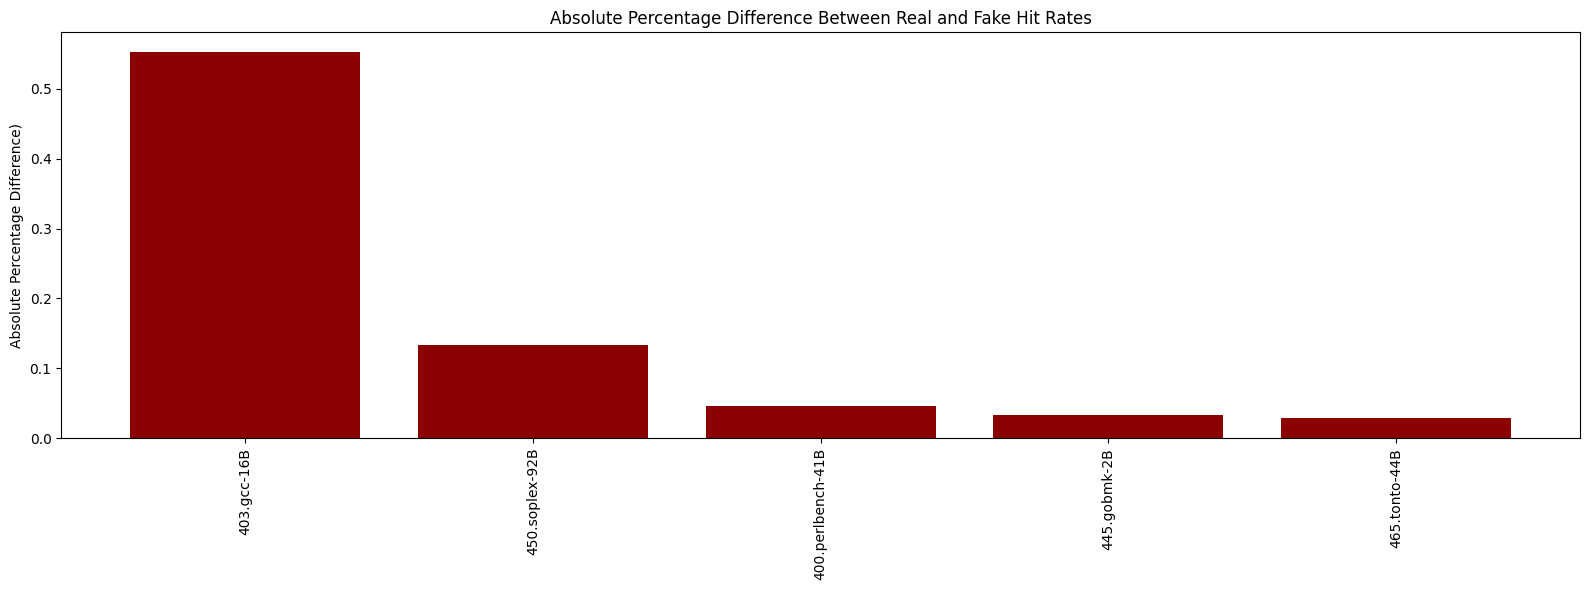

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both CSVs
real_df = pd.read_csv("hitrate_real_summary_1000.csv")
fake_df = pd.read_csv("hitrate_summary.csv")

# Normalize column names
real_df.columns = [c.lower() for c in real_df.columns]
fake_df.columns = [c.lower() for c in fake_df.columns]

# Keep only required columns
real_df = real_df[["trace", "hit_rate"]].rename(columns={"hit_rate": "real_hit"})
fake_df = fake_df[["trace", "hit_rate"]].rename(columns={"hit_rate": "fake_hit"})

# Merge by trace name
df = real_df.merge(fake_df, on="trace", how="inner")

# Compute Absolute Percentage Error (APE)
df["ape"] = (df["fake_hit"] - df["real_hit"]).abs()

# Sort by APE for cleaner visualization
df = df.sort_values("ape", ascending=False)

# Plot APE as bar graph
plt.figure(figsize=(16, 6))

x = range(len(df))
plt.bar(x, df["ape"], color="darkred")

plt.xticks(x, df["trace"], rotation=90)
plt.ylabel("Absolute Percentage Difference)")
plt.title("Absolute Percentage Difference Between Real and Fake Hit Rates")

plt.tight_layout()
plt.show()
